In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv(r'./data/train.csv')

In [3]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [4]:
df.dtypes

id                              int64
titulo                         object
descripcion                    object
tipodepropiedad                object
direccion                      object
ciudad                         object
provincia                      object
antiguedad                    float64
habitaciones                  float64
garages                       float64
banos                         float64
metroscubiertos               float64
metrostotales                 float64
idzona                        float64
lat                           float64
lng                           float64
fecha                          object
gimnasio                      float64
usosmultiples                 float64
piscina                       float64
escuelascercanas              float64
centroscomercialescercanos    float64
precio                        float64
dtype: object

In [5]:
df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

# Análisis por provincia

### Cantidad de publicaciones por provincia

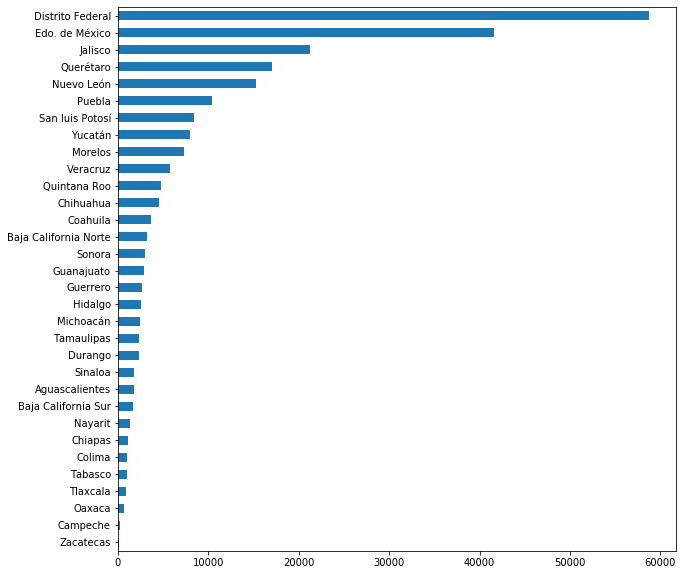

In [6]:
df['provincia'].value_counts().sort_values().plot(kind='barh', figsize=(10,10));

### Precio promedio por provincia

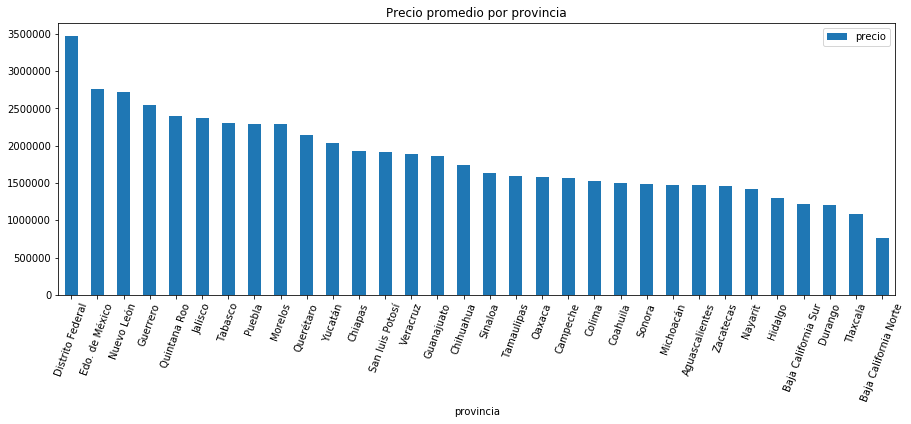

In [7]:
df.groupby('provincia').agg({'precio': 'mean'})\
    .sort_values('precio', ascending=False)\
    .plot(kind='bar', figsize=(15, 5), rot=70, title="Precio promedio por provincia");

### Precio por metro cuadrado total

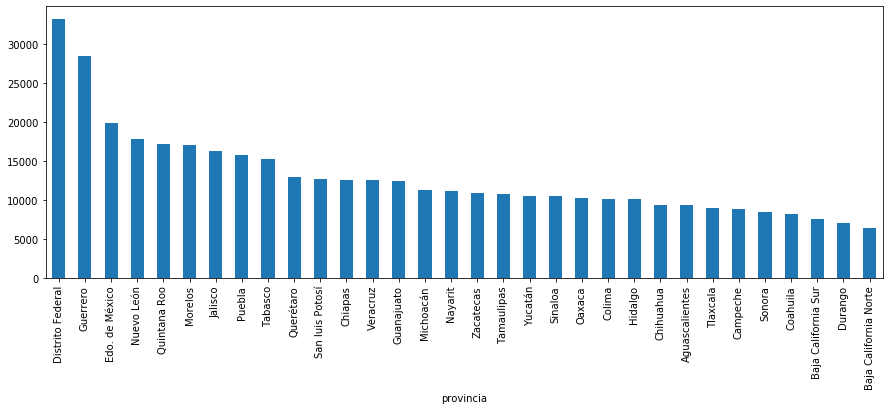

In [8]:
df_precio_por_m2 = df.groupby('provincia').agg({'precio': 'sum' , 'metrostotales' : 'sum'})
df_precio_por_m2['precio_por_m2'] = df_precio_por_m2['precio']/df_precio_por_m2['metrostotales']
df_precio_por_m2 = df_precio_por_m2.sort_values('precio_por_m2', ascending=False)
#precio por metro cuadrado total por provincia
df_precio_por_m2['precio_por_m2'].plot(kind='bar', figsize=(15,5));

### Precio por metro cuadrado cubierto

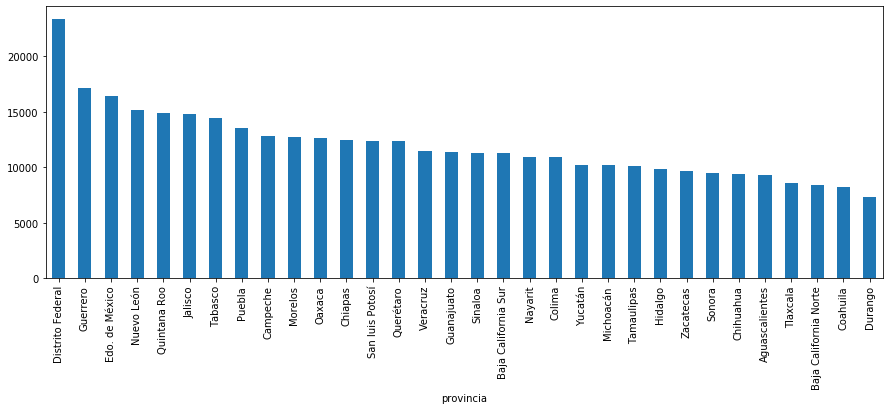

In [9]:
df_precio_por_m2 = df.groupby('provincia').agg({'precio': 'sum' , 'metroscubiertos' : 'sum'})
df_precio_por_m2['precio_por_m2'] = df_precio_por_m2['precio']/df_precio_por_m2['metroscubiertos']
df_precio_por_m2 = df_precio_por_m2.sort_values('precio_por_m2', ascending=False)
#precio por metro cuadrado cubierto por provincia
df_precio_por_m2['precio_por_m2'].plot(kind='bar', figsize=(15,5));

# Análisis según tamaño

### Número de publicaciones según el tamaño del inmueble

In [10]:
df['tamano_del_inmueble'] = df['metrostotales']
df['tamano_del_inmueble'] = pd.cut(df['tamano_del_inmueble'], 3, labels=['chico', 'mediano', 'grande'])

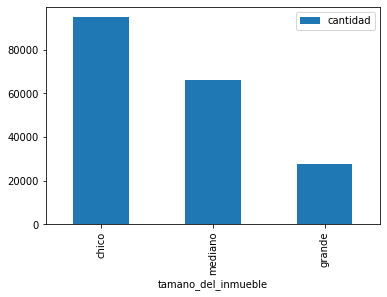

In [11]:
df.groupby('tamano_del_inmueble').agg({'tamano_del_inmueble':'count'})\
  .rename(columns={'tamano_del_inmueble':'cantidad'}).plot(kind='bar');

### Cantidad de inmuebles y su precio promedio en relación al tamaño

In [12]:
df1 = df.groupby('tamano_del_inmueble').agg({'tamano_del_inmueble':'count'}).rename(columns={'tamano_del_inmueble':\
            'cantidad'})

In [13]:
df2 = df.groupby('tamano_del_inmueble').agg({'precio':'mean'}).rename(columns={'precio':'precio_promedio'})

In [14]:
df3 = pd.merge(df1, df2, on='tamano_del_inmueble', how='inner')

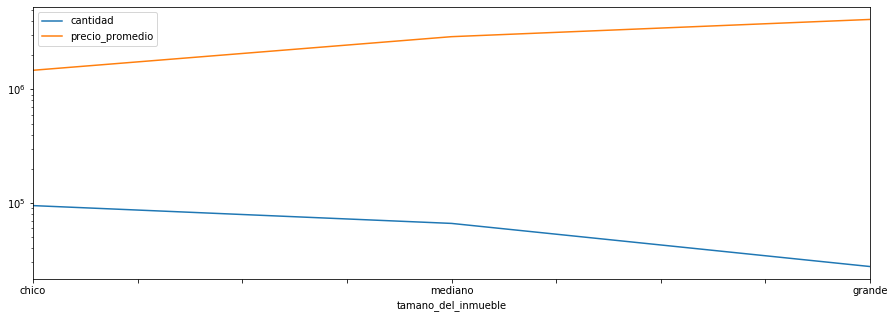

In [15]:
#cantidad de inmuebles y su precio promedio en relacion al tamaño
df3.plot(kind='line', figsize=(15,5), logy=True);

In [16]:
#tipo de propiedad por provincia
#para ver porque en ciertas provincias el m2 vale mas que en otras
#capaz tiene que ver con el tipo de propiedad que mas hay en esa prov, naturalmente un edificio vale mas que un garage
#por tamaño, amenities, etc
df4 = df.groupby(['provincia','tipodepropiedad']).agg({'tipodepropiedad':'count'}).rename(columns={'tipodepropiedad':'cant'})
df4 = df4.reset_index()

# Análisis según antigüedad

### Número de publicaciones

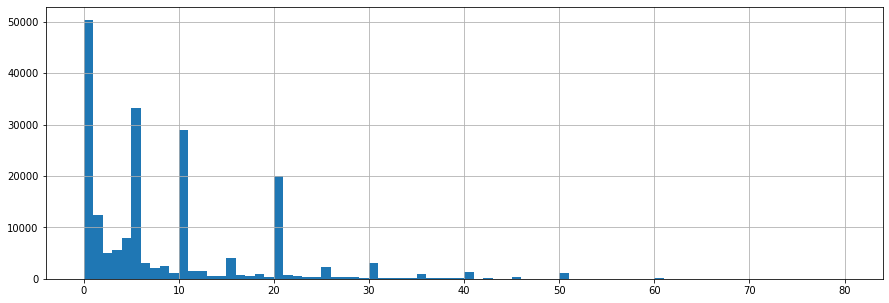

In [17]:
#cantidad de inmuebles por antiguedad
df['antiguedad'].hist(bins=80,figsize=(15,5));

In [18]:
df['antiguedad_cat'] = df['antiguedad']
df['antiguedad_cat'] = pd.cut(df['antiguedad_cat'], 4, labels=['entre 0 y 20', 'entre 20 y 40',\
                                                               'entre 40 y 60', 'entre 60 y 80'])

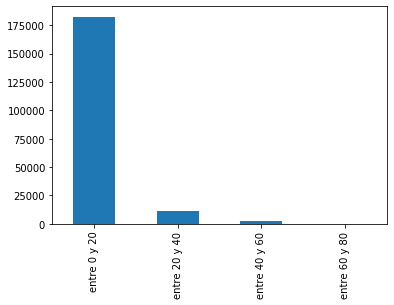

In [19]:
#cantidad de inmuebles segun antiguedad
df['antiguedad_cat'].value_counts().plot(kind='bar');

### Precio promedio por antigüedad

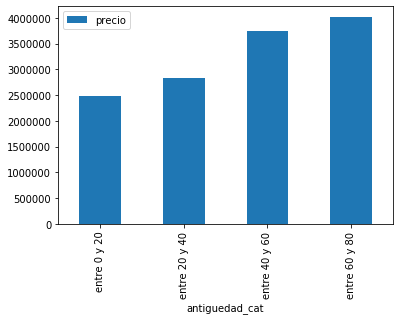

In [20]:
#precio promedio segun antiguedad
df.groupby('antiguedad_cat').agg({'precio':'mean'}).plot(kind='bar');
#al parecer el precio aumenta con la antiguedad

### Tamaño promedio por antigüedad

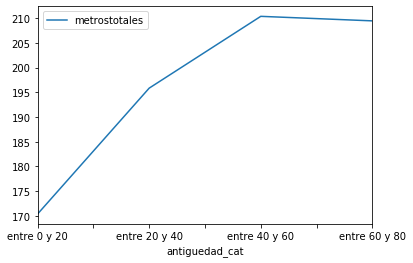

In [21]:
df.groupby('antiguedad_cat').agg({'metrostotales':'mean'}).plot();
#las casas mas viejas solian ser mas grandes, eso explica en parte que tambien aumente el precio con la antiguedad
#porque como vimos anteriormente, cuanto mas grande mayor precio

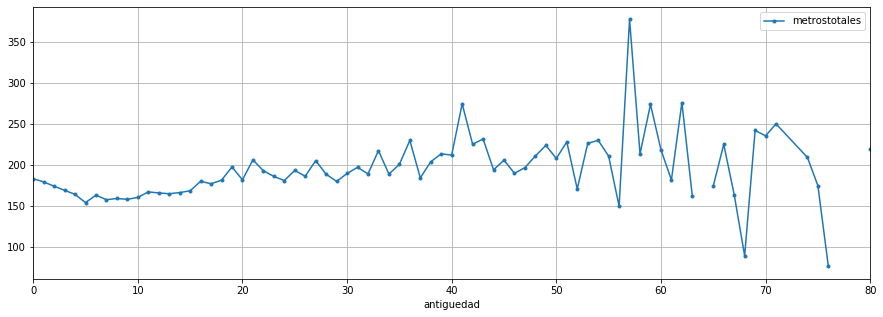

In [22]:
df.groupby('antiguedad').agg({'metrostotales':'mean'}).plot(grid=True, figsize=(15,5),style='.-');

# Análisis según tipo de propiedad

### Precio promedio por tipo de propiedad

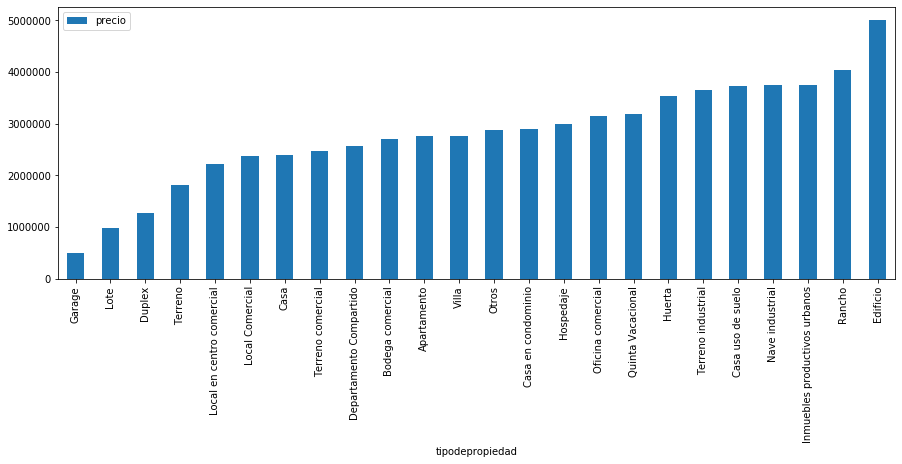

In [23]:
#precio promedio por tipo de propiedad
df.groupby('tipodepropiedad').agg({'precio':'mean'}).sort_values('precio').plot(kind='bar', figsize=(15,5));

### ¿Qué tipo de propiedad hay por provincia?

Sólo tome una de las más caras y una de las más baratas, habría que hacer mas

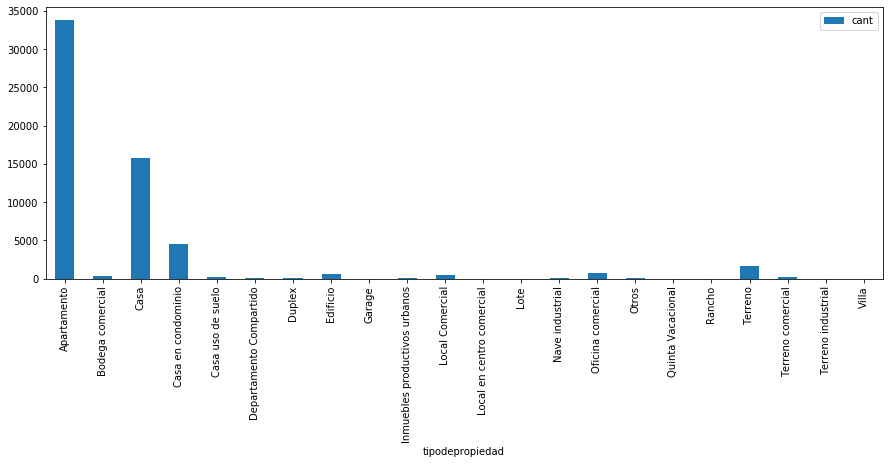

In [24]:
df5 = df4.loc[df4['provincia'] == 'Distrito Federal']
df5 = df5.set_index('tipodepropiedad')
df5.plot(kind='bar', figsize=(15,5));

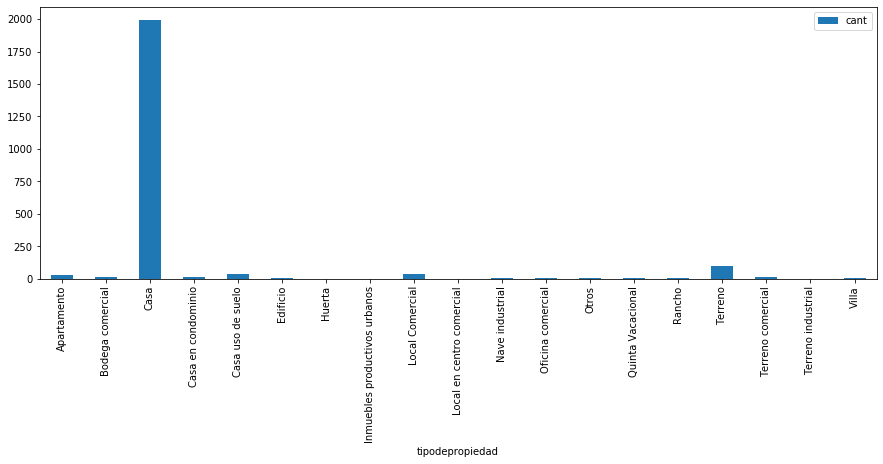

In [25]:
df4 = df4.loc[df4['provincia'] == 'Durango']
df4 = df4.set_index('tipodepropiedad')
df4.plot(kind='bar', figsize=(15,5));

# Análisis según características

### Cantidad de inmuebles y precio promedio según cantidad de garages

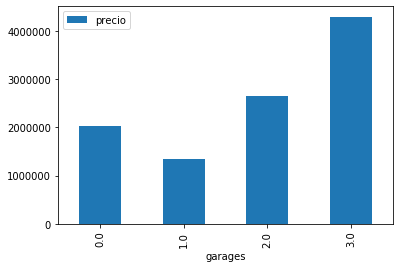

In [26]:
#precio promedio por cantidad de garages
df.groupby('garages').agg({'precio':'mean'}).plot(kind='bar');

### Cantidad de inmuebles y precio promedio según cantidad de habitaciones

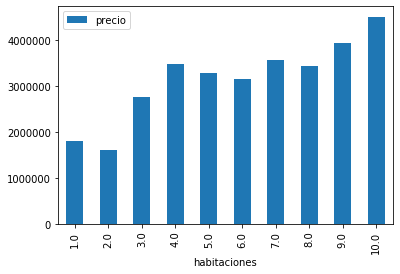

In [27]:
#precio promedio por cantidad de habitaciones
df.groupby('habitaciones').agg({'precio':'mean'}).plot(kind='bar');

### Cantidad de inmuebles y precio promedio según cantidad de baños

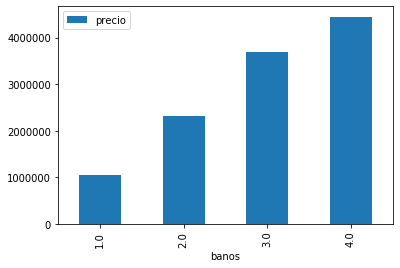

In [28]:
#precio promedio por cantidad de baños
df.groupby('banos').agg({'precio':'mean'}).plot(kind='bar');

### Cantidad de inmuebles y precio promedio por número de amenities

In [29]:
df['cant_amenities'] = df['gimnasio'] + df['usosmultiples'] + df['piscina']

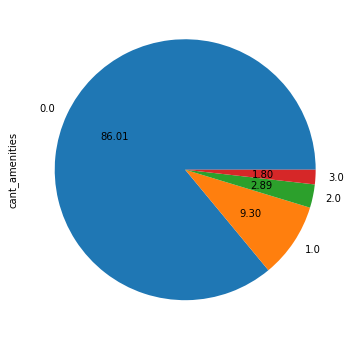

In [30]:
#porcentaje de inmuebles segun cantidad de amenities
df['cant_amenities'].value_counts().plot.pie(figsize=(6,6), autopct='%.2f');

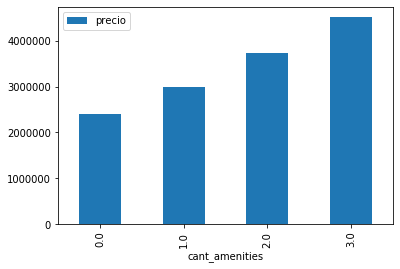

In [31]:
#promedio de precio segun cantidad de amenities
df.groupby('cant_amenities').agg({'precio' : 'mean'}).plot(kind='bar');

### Cantidad de inmuebles y precio promedio según sus cercanías 

In [32]:
df['centroscomercialescercanos'] = df['centroscomercialescercanos'].map({1:2, 0:0})
df['cercanias'] = df['escuelascercanas'] + df['centroscomercialescercanos']

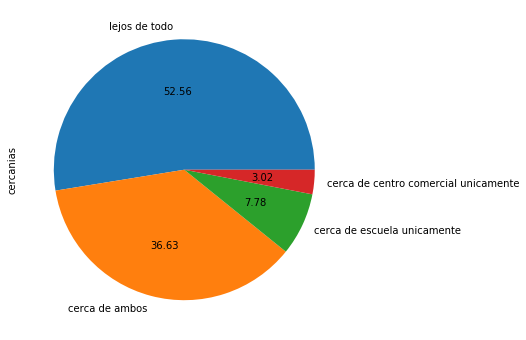

In [33]:
#porcentaje de casas segun sus cercanias (de forma rudimentaria)
labels = ['lejos de todo', 'cerca de ambos', 'cerca de escuela unicamente', 'cerca de centro comercial unicamente']
df['cercanias'].value_counts().plot.pie(figsize=(6,6), autopct='%.2f', labels=labels);

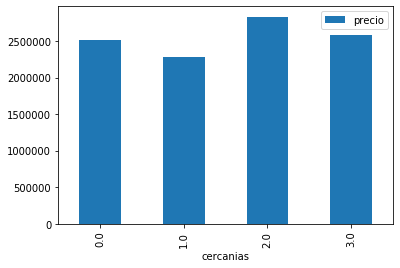

In [34]:
#precio promedio segun sus cercanias
#las que menos valen en promedio son las que estan cerca de escuelas (sera por el ruido?)
labels = ['lejos de todo', 'cerca de ambos', 'cerca de escuela unicamente', 'cerca de centro comercial unicamente']
df.groupby('cercanias').agg({'precio':'mean'}).plot(kind='bar');

Pareciera que las casas que están cerca de escuelas son las que en promedio menos valen, por eso a continuación se las compara con los otros tipos de casas para ver si tienen características desfavorables que las hagan valer menos

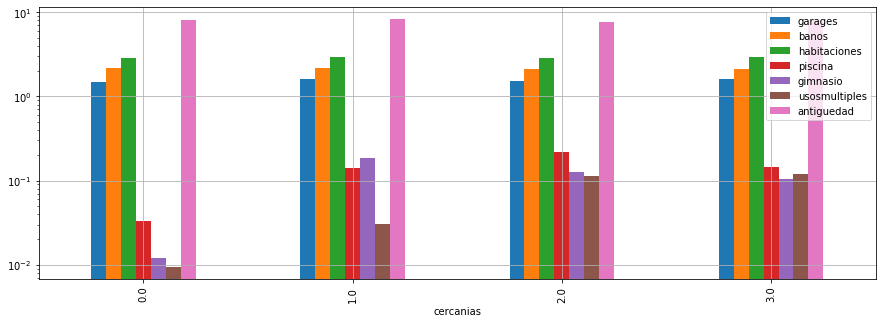

In [35]:
df.groupby('cercanias').agg({'garages':'mean', 'banos':'mean', \
                            'habitaciones':'mean', 'piscina':'mean', 'gimnasio':'mean', 'usosmultiples':'mean', \
                            'antiguedad':'mean'}).plot(kind='bar', logy=True, figsize=(15,5), grid=True);

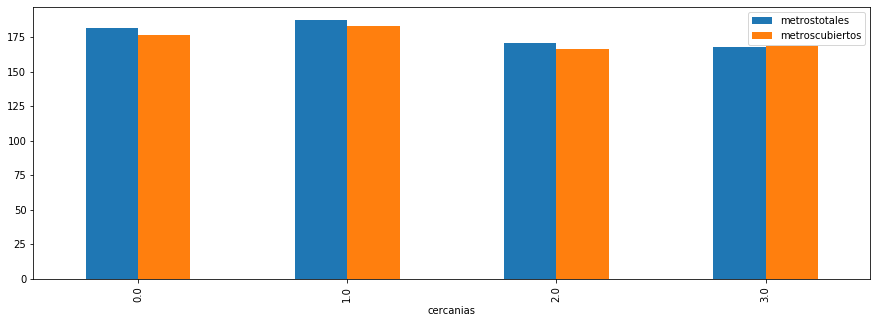

In [36]:
df.groupby('cercanias').agg({'metrostotales':'mean', 'metroscubiertos':'mean'})\
.plot(kind='bar', figsize=(15,5));

Incluso se ve que en promedio las casas cercanas a escuelas son las mas grandes

Lo que trate de hacer abajo es ver cual es el tipo de propiedad que más hay para las casas que están lejos de todo y para las que están cerca de escuelas únicamente

In [37]:
df94 = df.groupby(['cercanias','tipodepropiedad']).agg({'tipodepropiedad':'count'}).\
rename(columns={'tipodepropiedad':'cantidad'}).reset_index()

In [38]:
df_cercanias_0 = df94.loc[df94['cercanias'] == 0].copy()

In [39]:
df_cercanias_0['porcentaje'] = df_cercanias_0['cantidad'] * 100 / df_cercanias_0['cantidad'].sum()

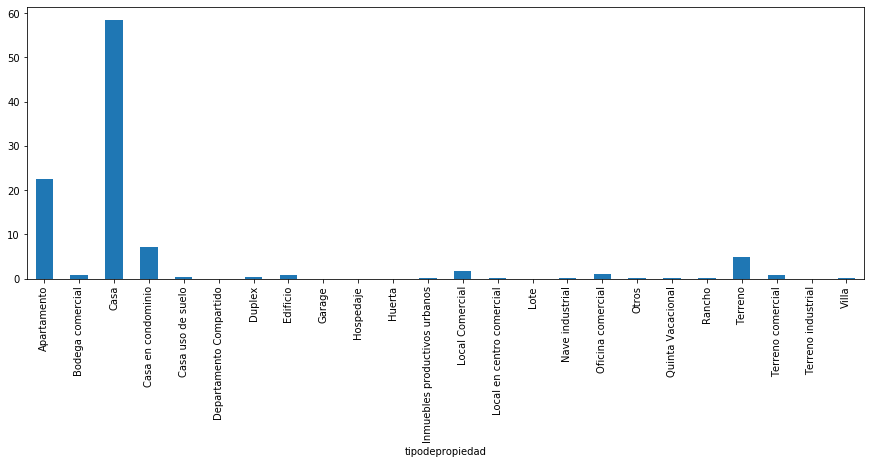

In [40]:
df_cercanias_0.set_index('tipodepropiedad')['porcentaje'].plot(kind='bar', figsize=(15,5))

In [41]:
df_cercanias_1 = df94.loc[df94['cercanias'] == 1].copy()

In [42]:
df_cercanias_1['porcentaje'] = df_cercanias_1['cantidad'] * 100 / df_cercanias_1['cantidad'].sum()
df_cercanias_1

,cercanias,tipodepropiedad,cantidad,porcentaje
24,1.0,Apartamento,2975,15.926977
25,1.0,Bodega comercial,33,0.176669
26,1.0,Casa,13299,71.197602
27,1.0,Casa en condominio,1319,7.061406
28,1.0,Casa uso de suelo,33,0.176669
29,1.0,Departamento Compartido,6,0.032122
30,1.0,Duplex,1,0.005354
31,1.0,Edificio,50,0.267680
32,1.0,Inmuebles productivos urbanos,16,0.085658
33,1.0,Local Comercial,119,0.637079


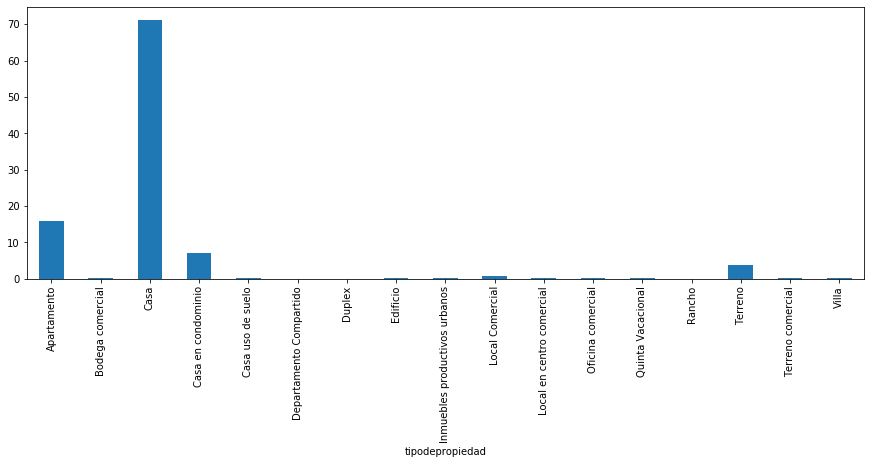

In [43]:
df_cercanias_1.set_index('tipodepropiedad')['porcentaje'].plot(kind='bar', figsize=(15,5))

In [67]:
#extraigo el anio de la fecha de cada registro
df['_fecha'] = pd.to_datetime(df['fecha'])
df['anio_publicacion'] = df['_fecha'].dt.year

In [68]:
#agrupo por provincia, anio publicacion y cuento las publicaciones
df['cantidad'] = 1 
df2 = df.groupby(['anio_publicacion','provincia'])\
.agg({'cantidad':'count'}).reset_index()

In [71]:
df2.head(10)
#falta obtener los top 5 por anio y generar el grafico.

,anio_publicacion,provincia,cantidad
0,2012,Aguascalientes,177
1,2012,Baja California Norte,301
2,2012,Baja California Sur,239
3,2012,Campeche,48
4,2012,Chiapas,162
5,2012,Chihuahua,254
6,2012,Coahuila,483
7,2012,Colima,183
8,2012,Distrito Federal,6197
9,2012,Durango,192
